# Easy21 Reinforcement Learning

This is an attempt to implement the [Easy21][] assignment from
[David Silver's Reinforcement Learning class][class].

The core implementation is in Rust, and can be found at https://github.com/toolness/ml-fun/tree/master/rl/easy21.

[Easy21]: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching_files/Easy21-Johannes.pdf
[class]: http://www0.cs.ucl.ac.uk/staff/d.silver/web/Teaching.html

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

import easy21

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Monte Carlo

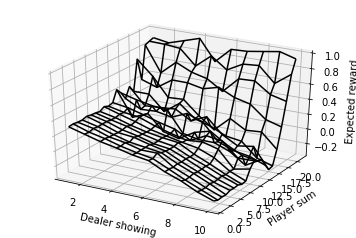

In [2]:
q_star = easy21.run_monte_carlo(1_000_000)

q_star.plot_optimal_reward()

## Sarsa(λ)

In [3]:
def plot_lambda_mse(title, run_fn, **kwargs):
    lambda_vals = []
    mean_squared_errs = []
    for i in range(0, 11, 1):
        lambda_val = i * 0.1
        lambda_vals.append(lambda_val)
        q = run_fn(lambda_val=lambda_val, **kwargs)
        mean_squared_errs.append(q_star.get_mean_squared_err(q))

    plt.plot(lambda_vals, mean_squared_errs)
    plt.title(f"Mean squared errors for {title} values")
    plt.xlabel("λ")
    plt.ylabel("Mean squared error from Q*(s, a)")
    plt.show()

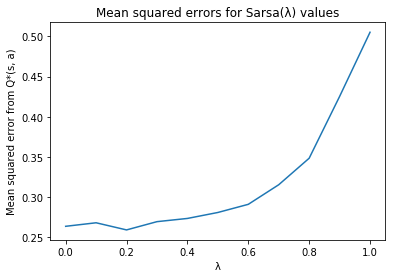

In [4]:
plot_lambda_mse("Sarsa(λ)", easy21.run_sarsa, episodes=1000)

In [5]:
def graph_episodes(title, run_fn, episodes, lambda_val, **kwargs):
    EPISODE_RANGE = range(1, episodes + 1)
    eps = []
    def cb(q):
        err = q_star.get_mean_squared_err(q)
        eps.append(err)
    run_fn(episodes=episodes, lambda_val=lambda_val, cb=cb, **kwargs)
    ep_nums = []
    mean_squared_errs = []
    for i in EPISODE_RANGE:
        ep_nums.append(i)
        mean_squared_errs.append(eps[i - 1])
    plt.plot(ep_nums, mean_squared_errs)
    plt.title(f"{title} mean squared errors for λ={lambda_val}")
    plt.xlabel("Episode number")
    plt.ylabel("Mean squared error")
    return plt.show()

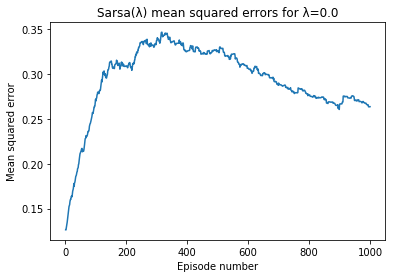

In [6]:
graph_episodes("Sarsa(λ)", easy21.run_sarsa, episodes=1000, lambda_val=0.0)

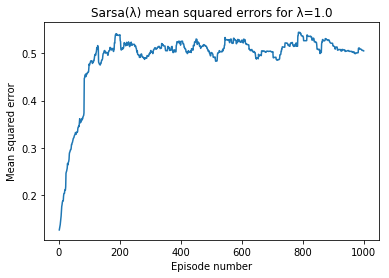

In [7]:
graph_episodes("Sarsa(λ)", easy21.run_sarsa, episodes=1000, lambda_val=1.0)

## Linear function approximation

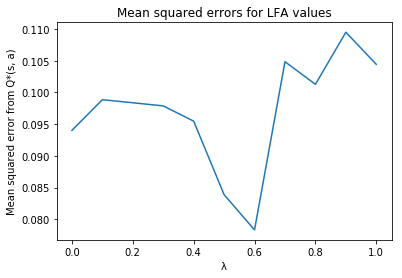

In [8]:
plot_lambda_mse("LFA", easy21.run_lfa, episodes=1000, epsilon=0.05, step_size=0.01)

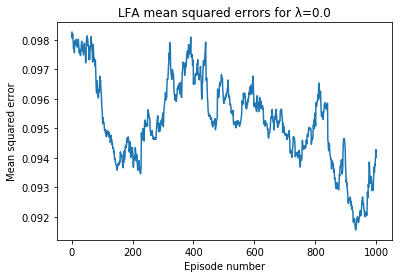

In [9]:
graph_episodes("LFA", easy21.run_lfa, episodes=1000, lambda_val=0.0, epsilon=0.05, step_size=0.01)

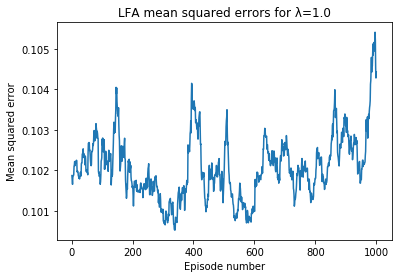

In [10]:
graph_episodes("LFA", easy21.run_lfa, episodes=1000, lambda_val=1.0, epsilon=0.05, step_size=0.01)